In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from numpy import log
from IPython.display import HTML
datadl = __import__('20201224_US_conditions_code')
%matplotlib notebook

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [64]:
# Data Download
from_internet = False
start = '2000'
data = datadl.read_data(from_internet=from_internet)

In [65]:
def ax_format(ax):
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    #ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [66]:
# GDP
df = data['gdp']
if from_internet == True:
    df = df.reset_index()
df.columns = ['Date', 'RGDP', 'PRGDP']
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df = df[start:]

In [67]:
# PCE
pce = data['inflation']
if from_internet == True:
    pce = pce.reset_index()
pce.columns = ['Date', 'Core', 'Headline']
pce.Date = pd.to_datetime(pce.Date)
pce = pce.set_index('Date').multiply(100)
pce = pce[start:]

In [68]:
# Slack
slack = data['slack']
if from_internet == False:
    slack = slack.rename(columns={'Unnamed: 0':'Date'})
    slack.Date = pd.to_datetime(slack.Date)
    slack = slack.set_index('Date')
slack = slack[start:]

### Domestic Fundamental Conditions

<IPython.core.display.Javascript object>


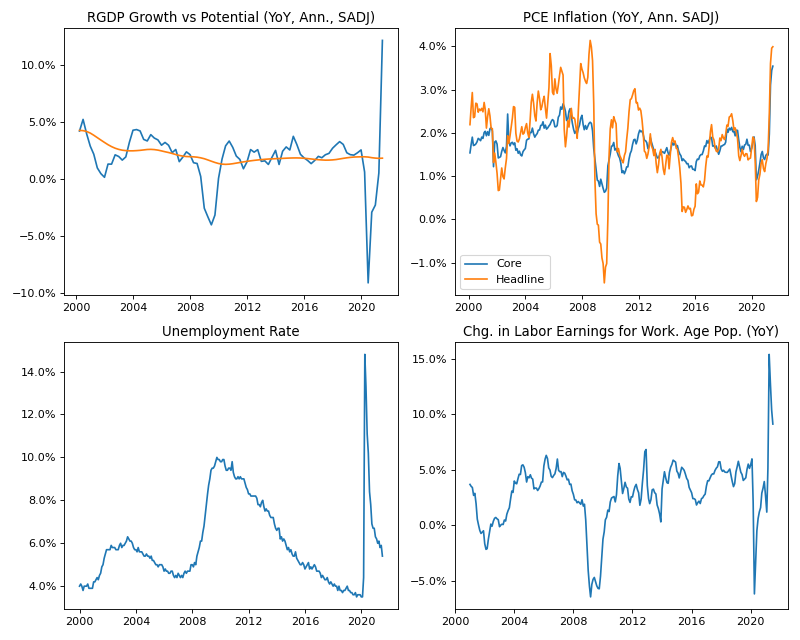

In [69]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].plot(df.multiply(100))
ax_format(ax[0, 0])
ax[0, 0].set_title('RGDP Growth vs Potential (YoY, Ann., SADJ)')

ax[0, 1].plot(pce)
ax_format(ax[0, 1])
ax[0, 1].legend(['Core', 'Headline'])
ax[0, 1].set_title('PCE Inflation (YoY, Ann. SADJ)')

ax[1, 0].plot(slack.ue)
ax_format(ax[1, 0])
ax[1, 0].set_title('Unemployment Rate')

ax[1, 1].plot(slack.compPC.pct_change(12).multiply(100))
ax_format(ax[1, 1])
ax[1, 1].set_title('Chg. in Labor Earnings for Work. Age Pop. (YoY)')

plt.tight_layout()
plt.show()

In [70]:
# Credit Creation
cc = data['creditCreation']
if from_internet == False:
    cc = cc.rename(columns={'Unnamed: 0':'Date'})
    cc.Date = pd.to_datetime(cc.Date)
    cc = cc.set_index('Date')
cc = cc.multiply(100)
cc['Total'] = cc.totPrivate + cc.centralGovt
cc = cc[start:]

In [73]:
# Debt Service Coverage
dsc = data['DSC']
if from_internet == False:
    dsc = dsc.rename(columns={'index':'Date'})
    dsc.Date = pd.to_datetime(dsc.Date)
    dsc = dsc.set_index('Date')
dsc = dsc.multiply(100)
dsc = dsc[start:]

### Credit Creation and Debt Service

<IPython.core.display.Javascript object>


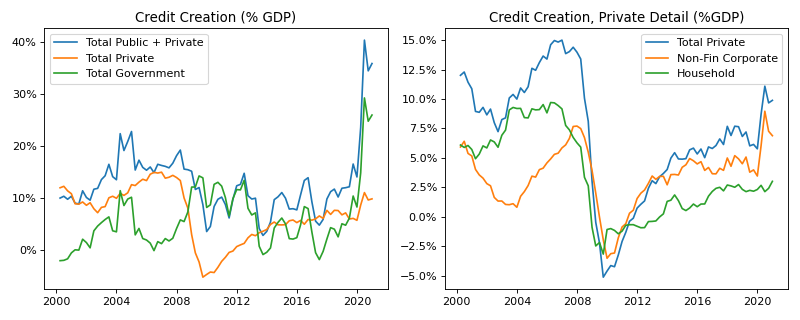

<IPython.core.display.Javascript object>


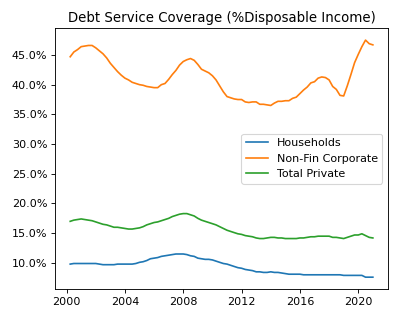

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(cc[['Total', 'totPrivate', 'centralGovt']])
ax_format(ax[0])
ax[0].legend(['Total Public + Private', 'Total Private', 'Total Government'])
ax[0].set_title('Credit Creation (% GDP)')

ax[1].plot(cc[['totPrivate', 'nonfin', 'hh']])
ax_format(ax[1])
ax[1].legend(['Total Private', 'Non-Fin Corporate', 'Household'])
ax[1].set_title('Credit Creation, Private Detail (%GDP)')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(dsc)
ax_format(ax)
ax.legend(['Households', 'Non-Fin Corporate', 'Total Private'])
ax.set_title('Debt Service Coverage (%Disposable Income)')
plt.tight_layout()
plt.show()

In [85]:
# Balance of Payments
bop = data['bop']
if from_internet == False:
    bop = bop.rename(columns={'Time': 'Date'})
    bop.Date = pd.to_datetime(bop.Date)
    bop = bop.set_index('Date')
bop = bop.rolling(12).mean()
bop = bop[start:]

### External Conditions

<IPython.core.display.Javascript object>


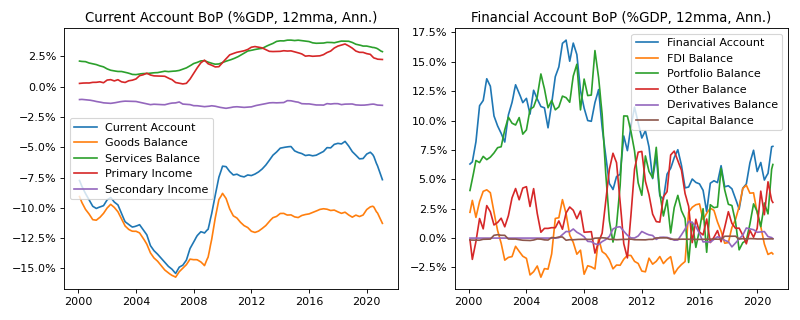

<IPython.core.display.Javascript object>


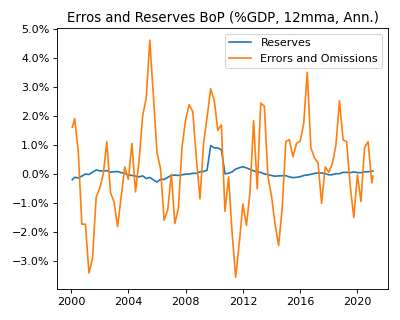

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(bop.loc[:, :'secondary'])
ax[0].legend(['Current Account', 'Goods Balance', 'Services Balance', 'Primary Income', 'Secondary Income'])
ax_format(ax[0])
ax[0].set_title('Current Account BoP (%GDP, 12mma, Ann.)')

ax[1].plot(bop.loc[:, 'financial':'capital'])
ax[1].legend(['Financial Account', 'FDI Balance', 'Portfolio Balance', 'Other Balance', 'Derivatives Balance',
              'Capital Balance'])
ax_format(ax[1])
ax[1].set_title('Financial Account BoP (%GDP, 12mma, Ann.)')
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(bop.loc[:, 'reserves':])
ax.legend(['Reserves', 'Errors and Omissions'])
ax_format(ax)
ax.set_title('Erros and Reserves BoP (%GDP, 12mma, Ann.)')
plt.tight_layout()
plt.show()


In [87]:
mkt = data['mkt']
if from_internet == False:
    mkt = mkt.rename(columns={'Unnamed: 0': 'Date'})
    mkt.Date = pd.to_datetime(mkt.Date)
    mkt = mkt.set_index('Date')

stocks = mkt[['spy', 'qqq', 'iwm', 'acwx']].copy()
mkt = mkt[start:]

In [91]:
stocks = stocks[start:]
stocks = stocks.pct_change().add(1).cumprod()

first_date = [stocks[ticker].dropna().index[0] for ticker in ['qqq', 'iwm', 'acwx']]
first_date = dict(zip(['qqq', 'iwm', 'acwx'], first_date))

for ticker in first_date.keys():
    stocks[ticker] = stocks.spy[first_date[ticker]] * stocks[ticker]
stocks = log(stocks)
    


### Markets

<IPython.core.display.Javascript object>


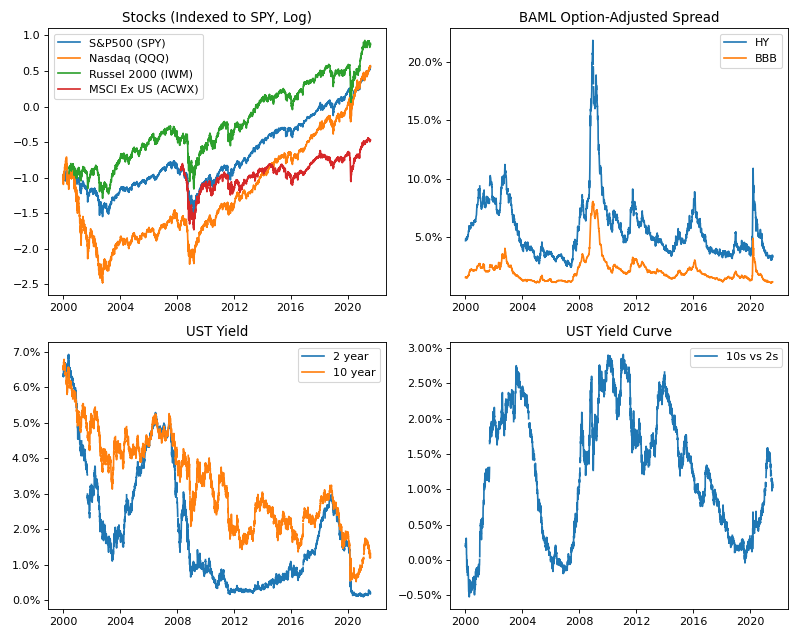

In [94]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))

ax[0, 0].plot(stocks - 1)
ax[0, 0].legend(['S&P500 (SPY)', 'Nasdaq (QQQ)', 'Russel 2000 (IWM)', 'MSCI Ex US (ACWX)'])
ax[0, 0].set_title('Stocks (Indexed to SPY, Log)')

ax[0, 1].plot(mkt[['bamlHY', 'bamlBBB']])
ax[0, 1].legend(['HY', 'BBB'])
ax[0, 1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[0, 1].set_title('BAML Option-Adjusted Spread')

ax[1, 0].plot(mkt[['2yr', '10yr']])
ax[1, 0].legend(['2 year', '10 year'])
ax[1, 0].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[1, 0].set_title('UST Yield')

ax[1, 1].plot(mkt['10yr'] - mkt['2yr'])
ax[1, 1].legend(['10s vs 2s'])
ax[1, 1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[1, 1].set_title('UST Yield Curve')

plt.tight_layout()
plt.show()